2. Effect Of Feature Scaling on Optimisation [2 Marks]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 100
np.random.seed(42)

# Generate data with large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

[1 marks] Using the above dataset, implement full-batch gradient descent for linear regression on the dataset above without any feature scaling. Define the convergence criterion as reaching an epsilon-neighborhood of the empirical least squares minimizer θ*, with ε = 0.001 (|θt−θ∗|<ϵ). Determine the number of iterations required to satisfy this convergence criterion. Plot mse loss versus iterations plot.

In [3]:
epsilon = 0.001
lr = 1e-10



X = np.vstack((np.ones(len(x)), x)).T
theta_star = np.linalg.inv(X.T @ X) @ (X.T @ y)
theta0_star, theta1_star = theta_star
print(f"True empirical minimizer: θ0*={theta0_star:.4f}, θ1*={theta1_star:.4f}")



def loss(x, y, theta0, theta1):
    return np.mean((y - (theta0 + theta1*x))**2)


def full_batch_gradient_descent(x, y, theta0, theta1, lr, epsilon,theta0_star,theta1_star):
    n = len(y)
    steps = 0
    loss_history = []
    
    while True:
        y_pred = theta0 + theta1*x
        error = y - y_pred
        d_theta0 = (-2/n)*sum(error)
        d_theta1 = (-2/n)*sum(error*x)
        
        theta0 = theta0 - lr * d_theta0
        theta1 = theta1 - lr * d_theta1

        steps += 1

        loss_history.append(loss(x, y, theta0, theta1))
        # dist = np.sqrt((theta0 - theta0_true)**2 + (theta1 - theta1_true)**2)
        # print(f"Epoch {epoch}: distance = {dist:.5f}")

        
        if np.sqrt((theta0 - theta0_star)**2 + (theta1 - theta1_star)**2) < epsilon:
            break
        if steps > 100000:
            print("Did not converge within 100000 steps")
            break
            
    return theta0,theta1,loss_history,steps

True empirical minimizer: θ0*=2.2151, θ1*=2.9995


In [4]:
theta0_init, theta1_init = 0, 0
theta0_final, theta1_final, loss_unscaled, steps_unscaled = full_batch_gradient_descent(
    x, y, theta0_init, theta1_init, lr, epsilon,theta0_star,theta1_star
)

print(f"θ0 = {theta0_final:.4f}, θ1 = {theta1_final:.4f}")

Did not converge within 100000 steps
θ0 = 0.0046, θ1 = 2.9967


In [8]:
print(abs(theta0_final - theta0_star), abs(theta1_final - theta1_star) )

2.2105191824511965 0.0028879485679849104


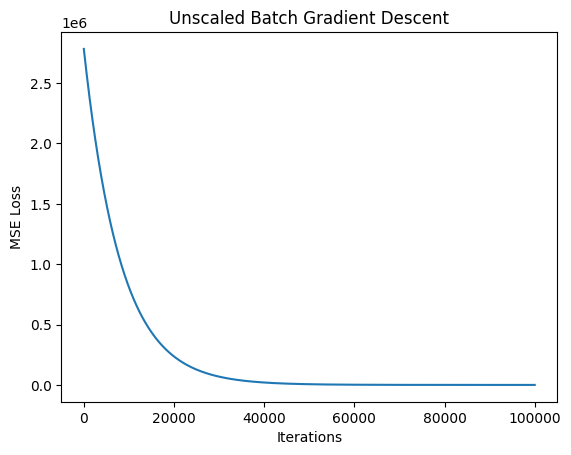

In [6]:
plt.plot(loss_unscaled)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Unscaled Batch Gradient Descent")
plt.show()


[1 marks] Apply z-score normalization to the feature: xscaled=(x−μx)/σx. Run full-batch gradient descent on the scaled dataset with the same convergence criterion (ϵ=0.001). Determine the number of iterations required for convergence. Plot mse loss versus iterations plot.

True empirical minimizer: θ0*=1.9989, θ1*=2.8639
Scaled data converged in 37 iterations
Final values: θ0 = 1.9984, θ1 = 2.8632


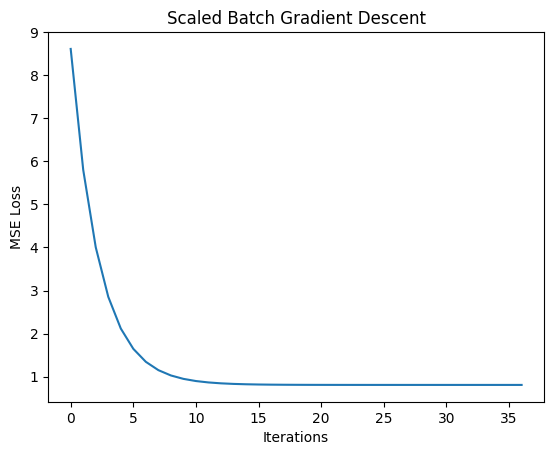

In [7]:
x_scaled = (x - np.mean(x)) / np.std(x)
f_x = 3 * x_scaled + 2
y = f_x + eps

X = np.vstack((np.ones(len(x_scaled)), x_scaled)).T
theta_star = np.linalg.inv(X.T @ X) @ (X.T @ y)
theta0_star_s, theta1_star_s = theta_star

lr = 0.1
print(f"True empirical minimizer: θ0*={theta0_star_s:.4f}, θ1*={theta1_star_s:.4f}")


theta0_final_s, theta1_final_s, loss_scaled, steps_scaled = full_batch_gradient_descent(
    x_scaled, y, theta0_init, theta1_init, lr, epsilon,theta0_star_s,theta1_star_s
)

print(f"Scaled data converged in {steps_scaled} iterations")
print(f"Final values: θ0 = {theta0_final_s:.4f}, θ1 = {theta1_final_s:.4f}")

plt.plot(loss_scaled)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Scaled Batch Gradient Descent")
plt.show()